In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

Лабораторная работа №2. Классификация

Чтение датасета

In [2]:
df = pd.read_csv('all_perth_preprocessed.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

Вывод информации о датасете

In [3]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df

The DataFrame has 30501 rows.
The DataFrame has 11 columns.


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,DATE_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST
0,565000,0.000000,0.000000,0.000000,-0.004876,-0.166686,0.381601,0.285683,0.088487,-0.316988,-0.296650
1,365000,-1.333715,0.000000,0.000000,-0.019504,-0.458386,0.858601,0.571366,0.849476,0.384914,2.467373
2,287000,-1.333715,-1.694922,-0.693615,0.002115,-1.194581,-0.763201,-0.571366,0.468981,-0.294346,0.186583
3,255000,-2.667430,-1.694922,0.000000,-0.001880,-1.569623,-2.003403,0.285683,0.053092,0.090568,0.140673
4,325000,0.000000,-1.694922,0.000000,-0.012748,-0.569509,0.143100,-0.285683,-0.539771,-0.271704,0.107124
...,...,...,...,...,...,...,...,...,...,...,...
30496,423000,-1.333715,0.000000,0.000000,-0.025554,-0.888990,0.763201,-0.285683,0.672502,0.566050,1.339044
30497,467000,0.000000,0.000000,0.000000,-0.016625,-0.555619,0.906301,-0.571366,-0.017697,-0.158494,-0.127136
30498,955000,-1.333715,0.000000,-0.693615,-0.028374,-0.625071,0.095400,0.571366,-0.115033,-0.294346,-0.116541
30499,1040000,0.000000,1.694922,0.000000,-0.022970,1.014004,0.858601,-0.285683,-0.106184,-0.384914,0.057682


Разделим данные на классы по цене

In [4]:
df['CLASS'] = pd.qcut(df['PRICE'], 4, labels=[0, 1, 2, 3])
df

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,DATE_SOLD,CBD_DIST,NEAREST_STN_DIST,NEAREST_SCH_DIST,CLASS
0,565000,0.000000,0.000000,0.000000,-0.004876,-0.166686,0.381601,0.285683,0.088487,-0.316988,-0.296650,2
1,365000,-1.333715,0.000000,0.000000,-0.019504,-0.458386,0.858601,0.571366,0.849476,0.384914,2.467373,0
2,287000,-1.333715,-1.694922,-0.693615,0.002115,-1.194581,-0.763201,-0.571366,0.468981,-0.294346,0.186583,0
3,255000,-2.667430,-1.694922,0.000000,-0.001880,-1.569623,-2.003403,0.285683,0.053092,0.090568,0.140673,0
4,325000,0.000000,-1.694922,0.000000,-0.012748,-0.569509,0.143100,-0.285683,-0.539771,-0.271704,0.107124,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30496,423000,-1.333715,0.000000,0.000000,-0.025554,-0.888990,0.763201,-0.285683,0.672502,0.566050,1.339044,1
30497,467000,0.000000,0.000000,0.000000,-0.016625,-0.555619,0.906301,-0.571366,-0.017697,-0.158494,-0.127136,1
30498,955000,-1.333715,0.000000,-0.693615,-0.028374,-0.625071,0.095400,0.571366,-0.115033,-0.294346,-0.116541,3
30499,1040000,0.000000,1.694922,0.000000,-0.022970,1.014004,0.858601,-0.285683,-0.106184,-0.384914,0.057682,3


Выведем распределение цен по классам

In [5]:
df.groupby('CLASS')['PRICE'].describe()

C:\Users\mmlit\AppData\Local\Temp\ipykernel_15612\1852239159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CLASS')['PRICE'].describe()


,count,mean,std,min,25%,50%,75%,max
CLASS,,,,,,,,
0,7862.0,3.197738e+05,73608.809315,52000.0,282500.0,335000.0,378000.0,410000.0
1,7397.0,4.728161e+05,36367.507403,410500.0,440000.0,471614.0,505000.0,539000.0
2,7636.0,6.367050e+05,65704.133090,539125.0,580000.0,630000.0,690000.0,765000.0
3,7606.0,1.131345e+06,354828.286068,766000.0,860000.0,1000000.0,1300000.0,2440000.0


Уберем столбец стоимости из датасета

In [6]:
df = df.drop('PRICE', axis=1)

Разбиваем датасет на тестовую и тренировочную выборки

In [7]:
x = df.drop('CLASS', axis=1)
y = df['CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

1. Обучение моделей и подбор памаметров

    a. K-ближайших соседей (KNN)

In [8]:
k_range = list(range(1, 31))
knn = GridSearchCV(estimator= KNeighborsClassifier(),
             param_grid={'n_neighbors': k_range, 'algorithm': ['ball_tree', 'kd_tree']}, n_jobs=-1)

knn.fit(x_train, y_train)
knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 13}

Сохраняем натренированную модель в файл

In [9]:
dump(knn, "knn_model.joblib") 

['knn_model.joblib']

    b. Машина опорных векторов (SVM)

In [10]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}
svm = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=3)
svm.fit(x_train, y_train)
svm.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [11]:
dump(svm, "svm_model.joblib")

['svm_model.joblib']

    c. Случайный лес

In [12]:
param_grid = {
    'n_estimators' : [10, 50, 100, 150],
    'criterion': ['gini'],
    'max_depth': [None, 2, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
}
random_forest = GridSearchCV(estimator=RandomForestClassifier(),  param_grid=param_grid,
                     n_jobs=-1, verbose=3, cv=5)
random_forest.fit(x_train, y_train)
random_forest.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [13]:
random_forest = random_forest.best_estimator_
dump(random_forest, "random_forest_model.joblib") 

['random_forest_model.joblib']

2. Оценка моделей

    a-b. Визуализация предсказанных значений. Оценка качества прогноза

        K-ближайших соседей (KNN)

C:\Users\mmlit\PycharmProjects\ml\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

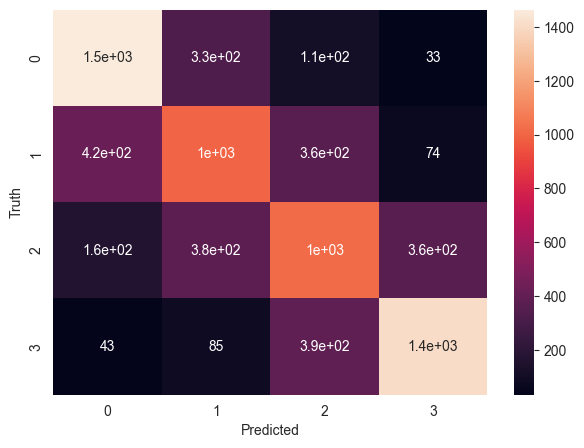

In [14]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1930
           1       0.56      0.54      0.55      1853
           2       0.54      0.53      0.54      1921
           3       0.75      0.73      0.74      1922

    accuracy                           0.64      7626
   macro avg       0.64      0.64      0.64      7626
weighted avg       0.64      0.64      0.64      7626


        Машина опорных векторов (SVM)

C:\Users\mmlit\PycharmProjects\ml\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

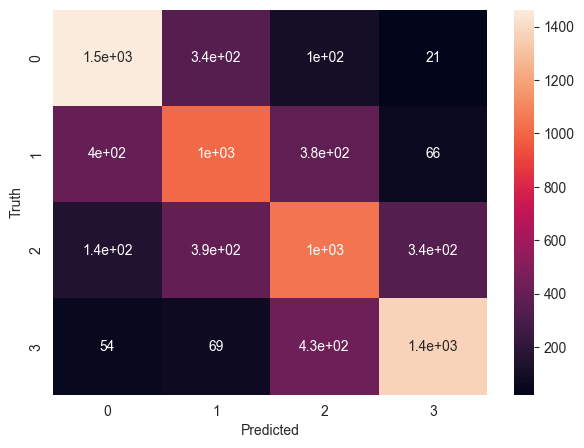

In [16]:
y_pred = svm.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1930
           1       0.56      0.55      0.55      1853
           2       0.53      0.54      0.54      1921
           3       0.76      0.71      0.74      1922

    accuracy                           0.64      7626
   macro avg       0.64      0.64      0.64      7626
weighted avg       0.64      0.64      0.64      7626


        Случайный лес

C:\Users\mmlit\PycharmProjects\ml\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

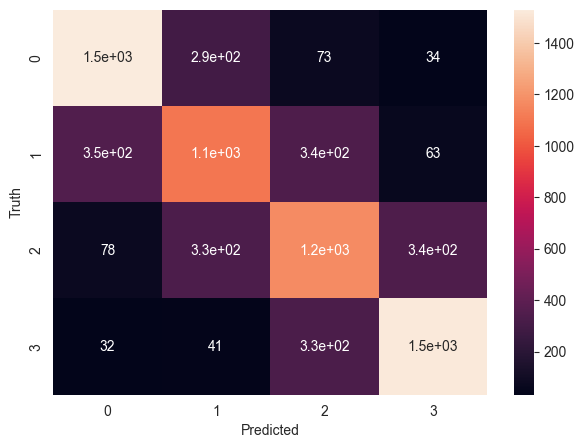

In [18]:
y_pred = random_forest.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1930
           1       0.62      0.59      0.61      1853
           2       0.61      0.61      0.61      1921
           3       0.78      0.79      0.78      1922

    accuracy                           0.70      7626
   macro avg       0.69      0.70      0.70      7626
weighted avg       0.70      0.70      0.70      7626


        c. Визуализация Feature Importance

Variable: FLOOR_AREA           Importance: 0.2
Variable: CBD_DIST             Importance: 0.2
Variable: LAND_AREA            Importance: 0.13
Variable: BUILD_YEAR           Importance: 0.11
Variable: NEAREST_STN_DIST     Importance: 0.11
Variable: NEAREST_SCH_DIST     Importance: 0.1
Variable: DATE_SOLD            Importance: 0.07
Variable: BEDROOMS             Importance: 0.03
Variable: BATHROOMS            Importance: 0.03
Variable: GARAGE               Importance: 0.03


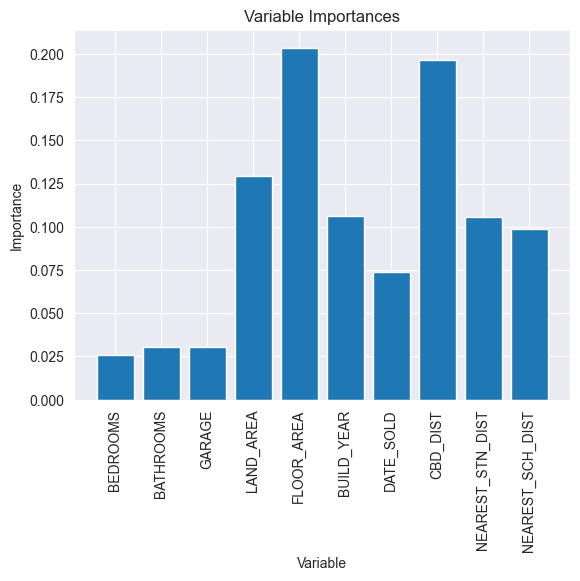

In [20]:
# Get numerical feature importances
importances = random_forest.feature_importances_

# Get the name of the features
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()